
Exercise: DC Housing Properties

    Due No Due Date Points 10 Submitting a website url

Use the D.C. Residential Properties dataset (Links to an external site.) from Kaggle to re-scale the "price" column using both z-score standardization and Min-max scaling.

HINTS: Replace or remove the missing values in the data.

Upload your notebook to your Github repository and submit the URL for this assignment.

In [1]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
filepath = "datasets/DC_Properties.csv"

df = pd.read_csv(filepath)
df.head()

C:\Users\Million\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [ ]:
#check if any missing values in the data
df.count()

In [ ]:
#descriptive statistics
df.describe()

In [ ]:
#plot the frequency count for each column
df.hist(figsize=(10,10))

In [3]:
#df.dropna(axis='PRICE')
df = df.dropna(how='all', subset = ['PRICE'])

print(df)

        Unnamed: 0  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  \
0                0       4          0      Warm Cool  Y        2.0      8   
2                2       3          1  Hot Water Rad  Y        2.0      9   
3                3       3          1  Hot Water Rad  Y        2.0      8   
5                5       3          2  Hot Water Rad  Y        1.0     10   
7                7       3          1  Hot Water Rad  Y        2.0      8   
...            ...     ...        ...            ... ..        ...    ...   
158951      158951       3          1     Forced Air  Y        NaN      5   
158952      158952       1          0     Forced Air  Y        NaN      3   
158953      158953       1          0     Forced Air  Y        NaN      4   
158954      158954       2          0     Forced Air  Y        NaN      4   
158955      158955       1          0      Warm Cool  Y        NaN      2   

        BEDRM     AYB  YR_RMDL  ...  LONGITUDE       ASSESSMENT_NBHD  \
0  

In [4]:
mean = df['PRICE'].mean()

std = df['PRICE'].std()

price_z_manual = (df['PRICE'] - mean)/std

mean, std

(931351.5949336156, 7061324.955612032)

In [5]:
price_z_manual.head()

0    0.023175
2    0.165500
3    0.094975
5    0.144257
7    0.016803
Name: PRICE, dtype: float64

In [6]:
scaler = StandardScaler()

price_zscore = scaler.fit_transform(df[['PRICE']])

In [8]:
price_zscore.mean(), price_zscore.std()

(-4.630074029551846e-18, 1.0)

In [9]:
minmax_sc = MinMaxScaler()

In [10]:
price_minmax = minmax_sc.fit_transform(df[['PRICE']])
price_mm_col = pd.Series(price_minmax.reshape(-1))
price_mm_col.head()

0    0.007968
1    0.015281
2    0.011657
3    0.014189
4    0.007640
dtype: float64

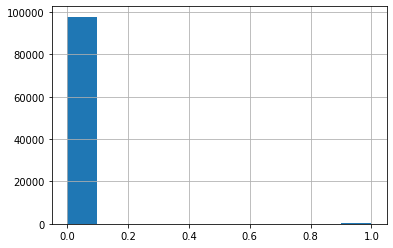

In [13]:
price_mm_col.hist()